<a href="https://colab.research.google.com/github/moaoa/tensorflow-fundamentals/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import tensorflow as tf
print(tf.__version__)

2.15.0


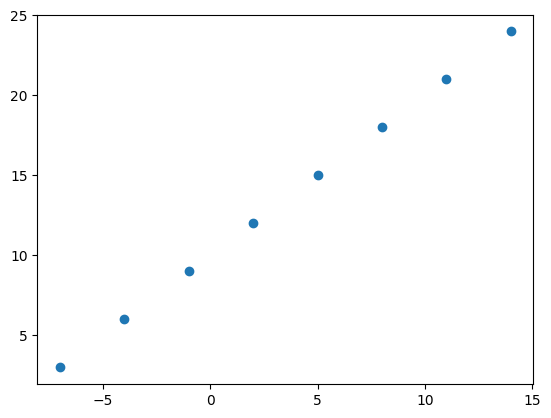

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

In [58]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [59]:
house_info.shape

TensorShape([3])

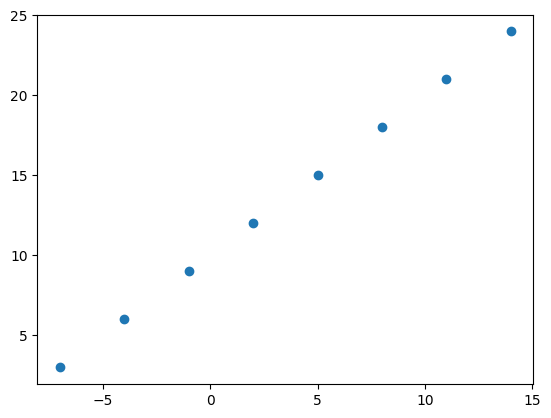

In [60]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

Y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

In [61]:
input_shape = X[0].shape

output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [62]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"]
)

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 334ms/step - loss: 8.8539 - mae: 8.8539
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 8.7214 - mae: 8.7214
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 8.5889 - mae: 8.5889
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.4564 - mae: 8.4564
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 8.3239 - mae: 8.3239


In [63]:
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[25.591612]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or no more data (give the model more examples to learn from).


In [64]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 395ms/step - loss: 14.5070 - mae: 14.5070
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 14.0140 - mae: 14.0140
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 13.5290 - mae: 13.5290
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 13.0477 - mae: 13.0477
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 12.5689 - mae: 12.5689
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 12.0913 - mae: 12.0913
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 11.6041 - mae: 11.6041
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 11.1038 - mae: 11.1038
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 10.5955 - mae: 10.5955
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 10.0671 - mae: 10.0671


In [65]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [66]:
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[11.405122]], dtype=float32)

In [67]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    # optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 552ms/step - loss: 13.4074 - mae: 13.4074
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7229 - mae: 12.7229
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0465 - mae: 12.0465
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3750 - mae: 11.3750
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7051 - mae: 10.7051
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0334 - mae: 10.0334
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3569 - mae: 9.3569
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6728 - mae: 8.6728
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9781 - mae: 7.9781
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2697 - mae: 7.2697
Epoch 11/100
1/1 [==============================] - 0s 11ms/ste

In [68]:
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[27.112228]], dtype=float32)

### **The learning rate is very important**

### **Evaluating a model**
> Visualize

It's a good idea to visualize:


*   The  data - what data are we workign
  with?
*   The model itself - what does our model look like?
*   The training of a model - how does a model perform while it learns?
*   The predictions of the model - how do the predictios of a model line up against what is should be

In [69]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [70]:
# Make labesl for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

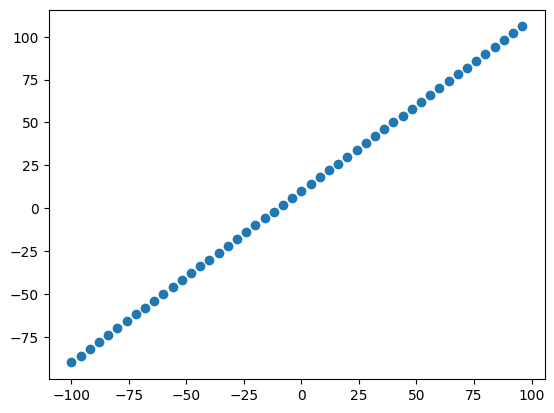

In [71]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 sets...
*   Trainnig set 70-80%
*   Validatio set (10-15%) - the model gets tuned on this data
*   Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% ot total data.

In [72]:
# Check the length of how many samples we have
len(X)

50

In [73]:
# Split the data into train and test sets
X_train = X[:40] # first 40 (80%)
Y_train = Y[:40]

Y_test = Y[40:]
X_test = X[40:] # first 40 (20%)

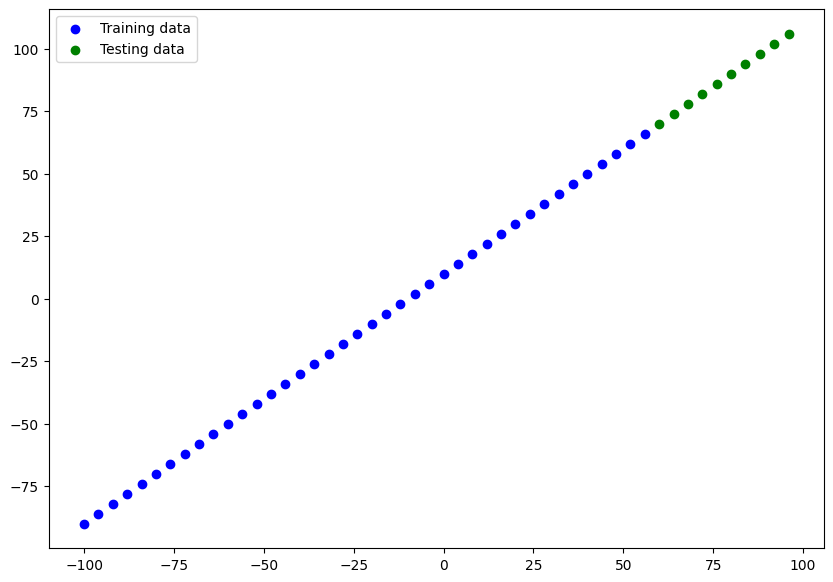

In [74]:
plt.figure(figsize=(10, 7))

# plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")

# plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show  a legend
plt.legend()


In [75]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 91.3810 - mae: 91.3810
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 55.9255 - mae: 55.9255
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4897 - mae: 19.4897
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8609 - mae: 9.8609
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8101 - mae: 10.8101
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9995 - mae: 9.9995
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0497 - mae: 9.0497
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1094 - mae: 9.1094
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.9032 - mae: 19.9032
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.7732 - mae: 10.7732
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

In [76]:
# Visualize the model
model.summary()
# video: 05:38

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Create a model
model = tf.keras.Sequential([
    # (let's try and play with the dense units)
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name="output_layer")

], name="model-1")

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=200, verbose=0)

In [78]:
#5:50

In [79]:
model.summary()

Model: "model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


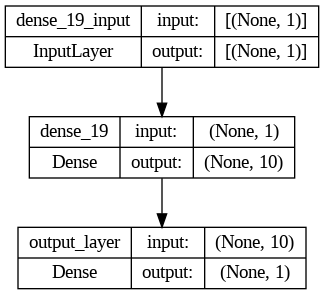

In [80]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model predictions

To visualize predictiosn, it's a good idea to plot them against the gorund truth labels.

Often you'ill see this in the form of y_test or y_true versus y_pred (ground truth versus  your model's predicitons)


In [81]:
# Make somoe predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[ 70.36702],
       [ 74.38804],
       [ 78.40906],
       [ 82.43008],
       [ 86.4511 ],
       [ 90.47212],
       [ 94.49315],
       [ 98.51417],
       [102.53518],
       [106.55619]], dtype=float32)

In [82]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [83]:
# Let's create a plotting function
def plot_predictions(
                     train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred
                     ):
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

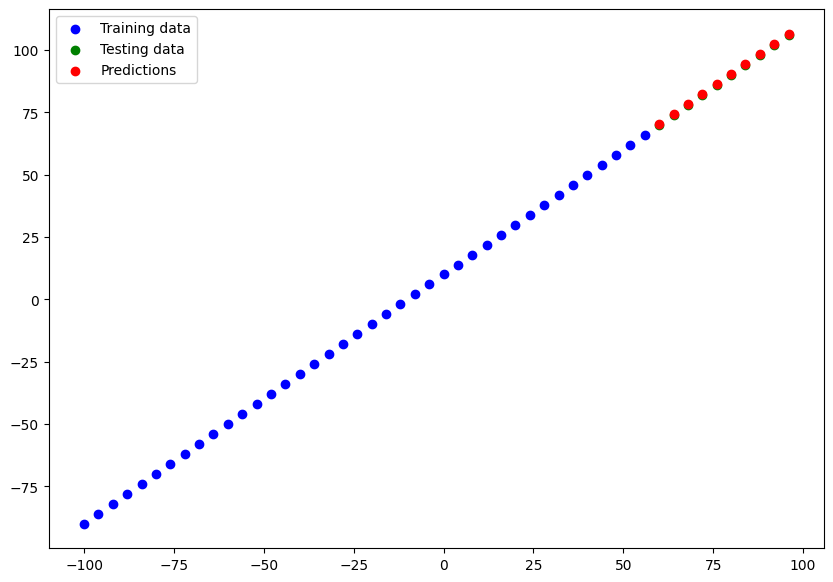

In [84]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - MEAN ABSOLUTE ERROR, "on average, how wrong is each of my model's predictions"
* MSE - mean square root: square the average error

In [85]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.4616 - mae: 0.4616


[0.4616096615791321, 0.4616096615791321]

In [86]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_pred=tf.constant(y_pred), y_true=Y_test)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.706385 , 14.567177 , 12.236377 , 10.7139845, 10.       ,
       10.094424 , 10.997259 , 12.708501 , 15.228144 , 18.55619  ],
      dtype=float32)>

In [87]:
# they don't have the same shape
tf.constant(y_pred), Y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.36702],
        [ 74.38804],
        [ 78.40906],
        [ 82.43008],
        [ 86.4511 ],
        [ 90.47212],
        [ 94.49315],
        [ 98.51417],
        [102.53518],
        [106.55619]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [88]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.36702,  74.38804,  78.40906,  82.43008,  86.4511 ,  90.47212,
        94.49315,  98.51417, 102.53518, 106.55619], dtype=float32)>

In [89]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true=Y_test,
    y_pred=tf.squeeze(y_pred) # we have to squeeze the y_pred to remove the last dim
  )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.4616104>

In [90]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(
      y_true=Y_test,
      y_pred=tf.squeeze(y_pred)
    )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.21672937>

In [91]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
~~~
Build a mdoel -> fit it -> evaluate it -> teak it -> fit it -> evaluate it -> tweak it ...


1. Get more data
2. Make you rmodel larger (more layers, more hidden units for each layer)
3. Train for longer give your model more of a chance to find patterens in the data

In [92]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the mdoel
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 15.1769 - mae: 15.1769
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9382 - mae: 10.9382
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6750 - mae: 11.6750
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3414 - mae: 9.3414
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2166 - mae: 10.2166
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4732 - mae: 9.4732
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6062 - mae: 8.6062
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0467 - mae: 9.0467
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.8424 - mae: 18.8424
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1643 - mae: 10.1643
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

1/1 [==============================] - 0s 45ms/step


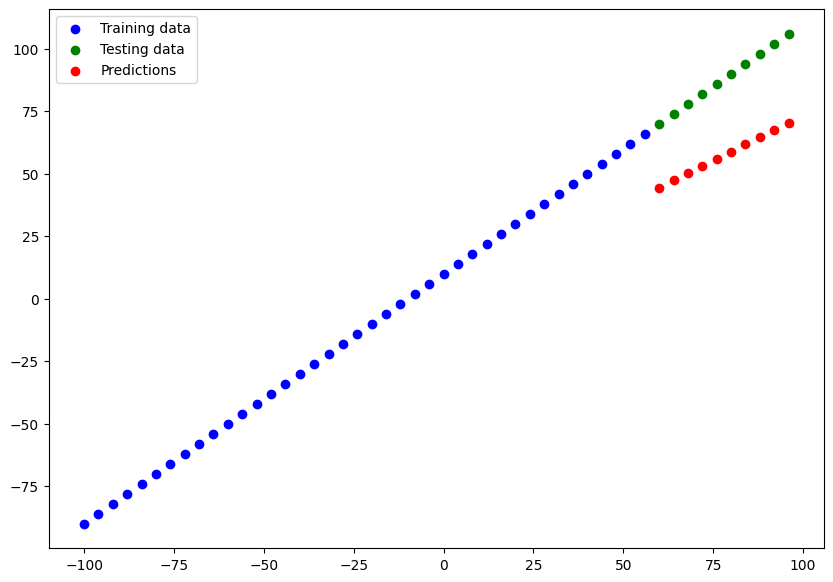

In [93]:
# Make and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [94]:
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.582983>,
 <tf.Tensor: shape=(), dtype=float32, numpy=945.7202>)

In [95]:
# 6:39

### Build `model_2`

In [96]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)



# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 42.7084 - mae: 42.7084
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 32.5359 - mae: 32.5359
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.4281 - mae: 37.4281
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 24.4153 - mae: 24.4153
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.5146 - mae: 14.5146
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5956 - mae: 11.5956
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6615 - mae: 12.6615
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0563 - mae: 11.0563
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 39.8011 - mae: 39.8011
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2798 - mae: 27.2798
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 55ms/step


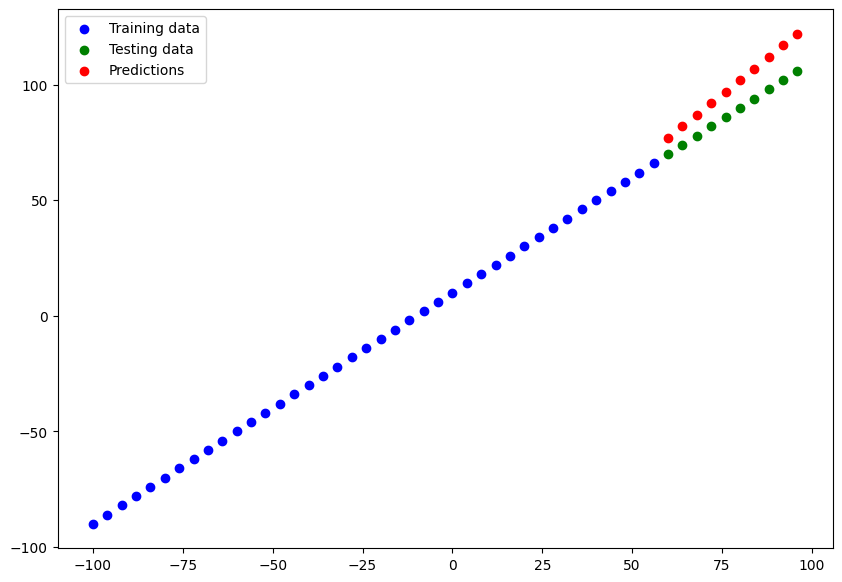

In [97]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [98]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test,  y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.465987>,
 <tf.Tensor: shape=(), dtype=float32, numpy=139.9606>)

In [99]:
### build `model_3`

# seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)



Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 63.4285 - mae: 63.4285
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 33.2776 - mae: 33.2776
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 36.8279 - mae: 36.8279
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 30.3258 - mae: 30.3258
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.4598 - mae: 15.4598
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 12.2793 - mae: 12.2793
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 11.5812 - mae: 11.5812
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 11.2652 - mae: 11.2652
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 42.3676 - mae: 42.3676
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 29.5163 - mae: 29.5163
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 74ms/step


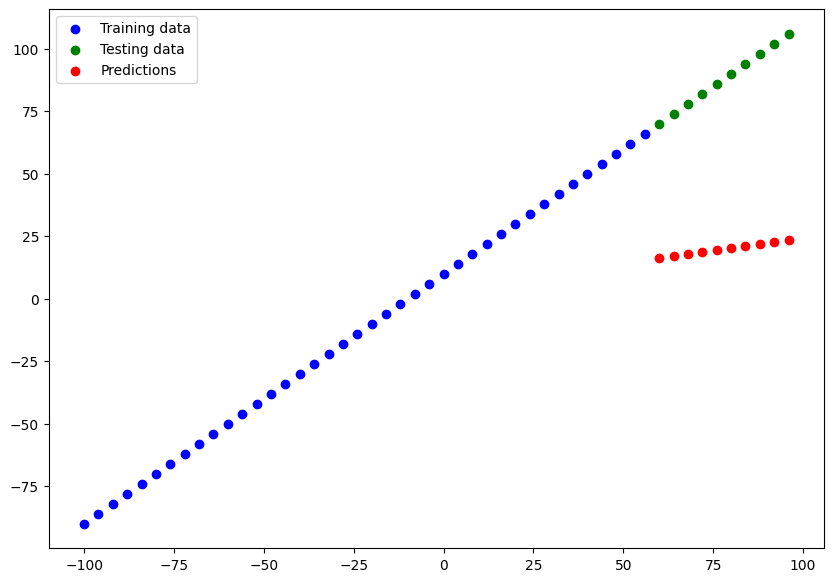

In [100]:
# plot perdictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [101]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
# 6:50

### Comparing the results of our experments

In [102]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,30.582983,945.720215
1,model_2,11.465987,139.960602
2,model_3,67.929993,4698.897461


In [104]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Note:** One of our goals is to minimize the time between expermints

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so , it can be tedious if you're running lots of experiments.

**Resource:**

* TensorBoard
* Weights & biases

# Saving our models

There are two formats we can save our models:

1. The SavedModel format
2. The HDF5 format

In [106]:
# Save model using the Saved format :
#(TensorFlow default format we can use and upgrade the model using this format)
model_2.save("best_model_saved_model_format")

In [107]:
# HDF5 format (the HDF5 standard) (just add .h5 at the end)
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading a Model

In [108]:
## Loading in a saved model
loaded_saved_model_format = tf.keras.models.load_model("/content/best_model_saved_model_format")
loaded_saved_model_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_saved_model_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [111]:
# load the h5 model
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [113]:
# Check to see if loaded .h5 model is the same as the old model
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 71ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download our model

1. "files" tab and right click on the filei you're after and click "download"
2. Use code (see the cell bellow).
3. Save it to Google Drive by connecting t Google Drive and saving it there



In [114]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from google colab to google Drive (requires mounting Google Drive)
!cp colab_path/to/file  Drive_path/to/file
# the second param you will see after mounting Google Drive

!ls Drive_path/to/file

# 7:30